In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [103]:

# Filter data for the USA in both datasets
data1 = pd.read_csv("files/dataset-hours-worked.csv", delimiter=',')
data2 = pd.read_csv("files/dataset-ai-jobs.csv", delimiter=',')
# Filter data for the USA in both datasets
data1 = data1[data1['LOCATION'] == 'USA']
data2 = data2[data2['Label'] == 'United States']
# Normalize country names in dataset 1
country_mapping = {
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CHE': 'Switzerland',
    'DEU': 'Germany',
    'ESP': 'Spain',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'NZL': 'New Zealand',
    'SWE': 'Sweden',
    'USA': 'United States'
}
data1['LOCATION'] = data1['LOCATION'].map(country_mapping)

# Normalize years in both datasets
data1['Year'] = data1['TIME']
data2['Year'] = data2['Year']
# Merge the two datasets on the 'Year' column
merged_data = pd.merge(data1, data2, on='Year')
# Merge the two datasets on the 'Year' column
merged_data = pd.merge(data1, data2, on='Year')

# Linear Regression for GDP Per Hour Worked
lin_reg = LinearRegression()
lin_reg.fit(merged_data[['Year']], merged_data['Value'])

# Polynomial Regression for AI Job Postings
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(merged_data[['Year']], merged_data['AI Job Postings (% of All Job Postings)'])


# Predicting for the next few years (2021-2025)
future_years = np.array([[year] for year in range(2023, 2030)])
gdp_predictions = lin_reg.predict(future_years)
ai_job_predictions = poly_reg.predict(future_years)

c:\Users\phil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\phil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [104]:
merged_data.head

<bound method NDFrame.head of         LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME     Value  \
0  United States  GDPHRWKD     TOT     USD         A  2014  68.66501   
1  United States  GDPHRWKD     TOT     USD         A  2015  69.04747   
2  United States  GDPHRWKD     TOT     USD         A  2016  69.25666   
3  United States  GDPHRWKD     TOT     USD         A  2017  69.87691   
4  United States  GDPHRWKD     TOT     USD         A  2018  70.66470   
5  United States  GDPHRWKD     TOT     USD         A  2019  71.52055   
6  United States  GDPHRWKD     TOT     USD         A  2020  73.95756   
7  United States  GDPHRWKD     TOT     USD         A  2021  74.83822   
8  United States  GDPHRWKD     TOT     USD         A  2022  73.98951   

  Flag Codes  Year  AI Job Postings (% of All Job Postings)          Label  
0        NaN  2014                                 0.005781  United States  
1        NaN  2015                                 0.007324  United States  
2        NaN  2016

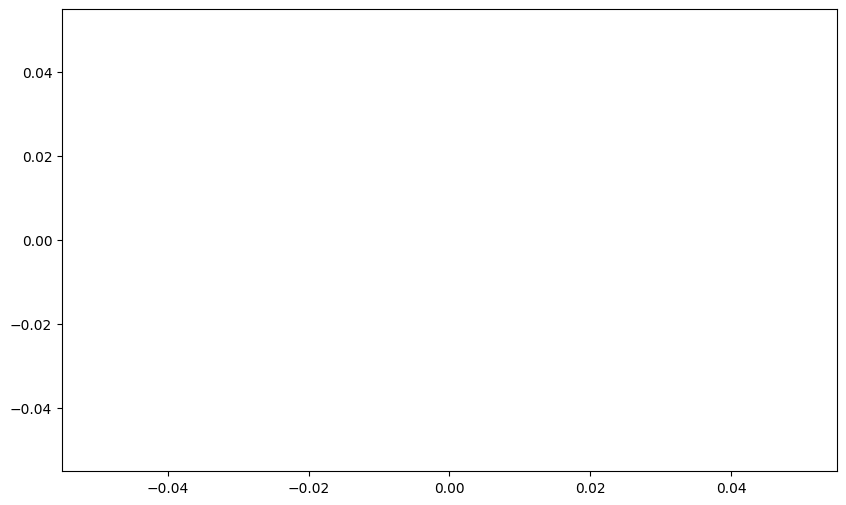

In [105]:
# # Create a figure and axis
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot GDP Per Hour Worked for the USA on the first axis
# usa_data = merged_data[merged_data['LOCATION'] == 'USA']
# ax1.plot(usa_data['Year'], usa_data['Value'], label='GDP Per Hour Worked (USA)', marker='o', color='b')

In [106]:


# Plot GDP Per Hour Worked for Germany on the first axis
germany_data = merged_data[merged_data['LOCATION'] == 'DEU']
ax1.plot(germany_data['Year'], germany_data['Value'], label='GDP Per Hour Worked (Germany)', marker='o', color='g')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Per Hour Worked (USD)')
ax1.tick_params(axis='y', labelcolor='b')

In [107]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
data1 = pd.read_csv("files/dataset-hours-worked.csv", delimiter=',')
data2 = pd.read_csv("files/dataset-ai-jobs.csv", delimiter=',')



C:\Users\phil\AppData\Local\Temp\ipykernel_1364\3560019788.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append({'Year': year[0], 'Value': gdp, 'AI Job Postings (% of All Job Postings)': ai_job}, ignore_index=True)
C:\Users\phil\AppData\Local\Temp\ipykernel_1364\3560019788.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append({'Year': year[0], 'Value': gdp, 'AI Job Postings (% of All Job Postings)': ai_job}, ignore_index=True)
C:\Users\phil\AppData\Local\Temp\ipykernel_1364\3560019788.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append({'Year': year[0], 'Value': gdp, 'AI Job Postings (% of All Job Postings)': ai_job}, ignore_inde

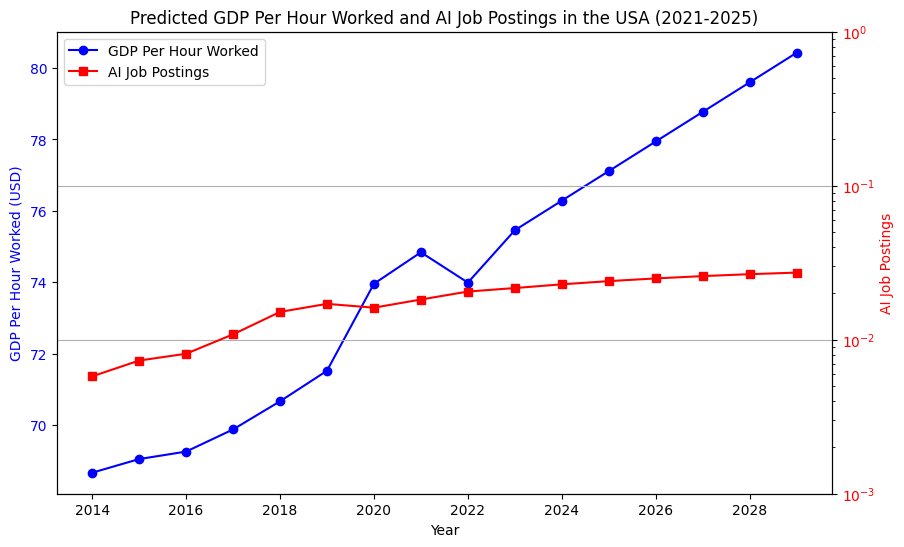

In [109]:

for year, gdp, ai_job in zip(future_years, gdp_predictions, ai_job_predictions):
    merged_data = merged_data.append({'Year': year[0], 'Value': gdp, 'AI Job Postings (% of All Job Postings)': ai_job}, ignore_index=True)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP Per Hour Worked on the first axis
ax1.plot(merged_data['Year'], merged_data['Value'], label='GDP Per Hour Worked', marker='o', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Per Hour Worked (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second axis for AI Job Postings with a logarithmic scale
ax2 = ax1.twinx()
ax2.semilogy(merged_data['Year'], merged_data['AI Job Postings (% of All Job Postings)'], label='AI Job Postings', marker='s', color='r')
ax2.set_ylabel('AI Job Postings', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customize the Y-axis ticks for AI Job Postings
ax2.set_ylim(0.001, 1)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and grid
plt.title('Predicted GDP Per Hour Worked and AI Job Postings in the USA (2021-2025)')
plt.grid(True)

# Show the plot
plt.show()